### <b>Part II : Logistic Regression</b>

In this part, we will work on logistic regression and will use a logistic function to model a binomial `(Binary / Bernoulli)` output variable. The logistic regression model predicts that the observation belongs to a particular category. To generate these probabilities, logistic regression uses the <b>sigmoid function</b> that maps a real number to a value between 0 and 1.

<b>DATASET</b>

For this Part, we will use `penguins` dataset, that you have preprocessed in Part I.

<b>STEPS 🔻 : </b>

1 🔽. Import required libraries (not allowed: scikit-learn or any other libraries with in-built functions that help to implement ML methods).

In [ ]:
# Importing all the required libraries

'''
NOTE : For the time being we are importing the most necessary ones.
If we are required more of them, will import accordin to need.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Now we will import our dataset. This dataset is the pre-processed version of
# the "penguins.csv" dataset. But for that we need to mount our google drive
# to directly import it from the drive's folder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing / Loading the dataset

penguins_pre_df = pd.read_csv("/content/drive/MyDrive/Datasets/penguins_preprocessed.csv")
penguins_pre_df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,0,0,2,0.254545,0.666667,0.152542,0.291667,1,2007.0
1,1,0,2,0.269091,0.511905,0.237288,0.305556,0,2007.0
2,2,0,2,0.298182,0.583333,0.389831,0.152778,0,2007.0
3,3,0,2,0.487062,0.585514,0.436693,0.417789,0,2007.0
4,4,0,2,0.167273,0.738095,0.355932,0.208333,0,2007.0
...,...,...,...,...,...,...,...,...,...
339,339,1,1,0.861818,0.797619,0.593220,0.361111,1,2009.0
340,340,1,1,0.414545,0.595238,0.508475,0.194444,0,2009.0
341,341,1,1,0.636364,0.607143,0.355932,0.298611,1,2009.0
342,342,1,1,0.680000,0.702381,0.644068,0.388889,1,2009.0


In [ ]:
# Let us drop the first feature, as it is of no use

penguins_pre_df = penguins_pre_df.drop(columns = {"Unnamed: 0"})
penguins_pre_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,0,2,0.254545,0.666667,0.152542,0.291667,1,2007.0
1,0,2,0.269091,0.511905,0.237288,0.305556,0,2007.0
2,0,2,0.298182,0.583333,0.389831,0.152778,0,2007.0
3,0,2,0.487062,0.585514,0.436693,0.417789,0,2007.0
4,0,2,0.167273,0.738095,0.355932,0.208333,0,2007.0
...,...,...,...,...,...,...,...,...
339,1,1,0.861818,0.797619,0.593220,0.361111,1,2009.0
340,1,1,0.414545,0.595238,0.508475,0.194444,0,2009.0
341,1,1,0.636364,0.607143,0.355932,0.298611,1,2009.0
342,1,1,0.680000,0.702381,0.644068,0.388889,1,2009.0


<br>
<br>

2 🔽. Choose your target Y. For this dataset, there are several options: <br>

   • We can use a binary classifier to predict which gender a penguin belongs to (female or male). In this case, column gender can be used as Y (target) <br>
   • We can use a binary classifier to predict if a penguin’s location is Torgersen island or not. In this case, column island can be used as Y (target)

In [ ]:
# Lets take column "gender" as the target variable (Y)

# But before that, to be on the safer side, let us create
# a copy of the dataset so that at the time of any mishap,
# we can revert back

pf_pre_copy = penguins_pre_df.copy()

# Y_target will be as follow (will be created later) :
pf_pre_copy['gender']

0      1
1      0
2      0
3      0
4      0
      ..
339    1
340    0
341    1
342    1
343    0
Name: gender, Length: 344, dtype: int64

In [ ]:
# If we compare this with the original dataset (where preprocessing was also NOT
# done !) :

penguins_orig_df = pd.read_csv("/content/drive/MyDrive/Datasets/penguins.csv")
penguins_orig_df['gender']

0        male
1      female
2      female
3         NaN
4      female
        ...  
339      male
340    female
341      male
342      male
343    female
Name: gender, Length: 344, dtype: object

In [ ]:
'''
We can now conclude that :

0 => FEMALE
1 => MALE
'''

'\nWe can now conclude that :\n\n0 => FEMALE\n1 => MALE\n'

<br>
<br>

3 🔽: Create the data matrices for X (input) and Y (target) in a shape X = 𝑁 x 𝑑 and Y = 𝑁 x 1, were 𝑁 is a number of data samples and 𝑑 has a number of features.

In [ ]:
# To create the Y_target, we need to extract / separate it from the dataset

Y_target = pf_pre_copy[["gender"]]

# This will be a 2D matrix (of shape N x 1)
# as prescribed in the prompt
Y_target

,gender
0,1
1,0
2,0
3,0
4,0
...,...
339,1
340,0
341,1
342,1


In [ ]:
# Lets check the shape of Y_target

Y_target.shape

(344, 1)

In [ ]:
# Now we ate going to create the X_input (shape : N x d)
# Here, 'd' is the number of features to be considered as input features

# The the input data values are needed to be extracted from the dataset
# as it also contains values of Y_target

X_input = pf_pre_copy.drop(columns = ['gender', 'year'])

# Let us see our X_input
X_input

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,2,0.254545,0.666667,0.152542,0.291667
1,0,2,0.269091,0.511905,0.237288,0.305556
2,0,2,0.298182,0.583333,0.389831,0.152778
3,0,2,0.487062,0.585514,0.436693,0.417789
4,0,2,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...,...,...
339,1,1,0.861818,0.797619,0.593220,0.361111
340,1,1,0.414545,0.595238,0.508475,0.194444
341,1,1,0.636364,0.607143,0.355932,0.298611
342,1,1,0.680000,0.702381,0.644068,0.388889


In [ ]:
# Lets check the shape of X_input

X_input.shape

(344, 6)

In [ ]:
# I need to add bias to my data. Thus, I will add a column of '1's at the starting
# of my input data

Bias = np.array([1]*344)
X_input.insert(0, 'Bias', Bias)

In [ ]:
# Lets check for the modified data

X_input

,Bias,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1,0,2,0.254545,0.666667,0.152542,0.291667
1,1,0,2,0.269091,0.511905,0.237288,0.305556
2,1,0,2,0.298182,0.583333,0.389831,0.152778
3,1,0,2,0.487062,0.585514,0.436693,0.417789
4,1,0,2,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...,...,...,...
339,1,1,1,0.861818,0.797619,0.593220,0.361111
340,1,1,1,0.414545,0.595238,0.508475,0.194444
341,1,1,1,0.636364,0.607143,0.355932,0.298611
342,1,1,1,0.680000,0.702381,0.644068,0.388889


<br>
<br>

4 🔽. Divide the dataset into training and test, as 80% training and 20% testing dataset.

In [ ]:
# As we cannot use the "train_test_split" function from the
# "scikit-learn" library, we have to create something equivalent
# to the above mentioned

# The given condition is that training data should include 80% of
# the original dataset while testing data should include 20% of it

# Let us split by considering training data
train_test_splitting_ratio = 0.8

# The total number of samples in training data should be : 0.8 X 344 = 275.2
# The total number of samples in testing data should be : 0.2 X 344 = 68.8
# The values will be rounded to nearest whole numbers (integer) on the later
# stage

# Taking "species" feature's values as the counting factor
samples_count_dataset = pf_pre_copy["species"].count()

# 344 X 0.8 = floor(275.2) = 275
samples_count_train = int(samples_count_dataset * train_test_splitting_ratio)

'''
NOTE : If we remember, "train_test_split" function shuffles the samples
before splitting - to make certain that the data's distribution is maintained
(and not biased / skewed) in both the training and testing sets. We can do the
same here.
'''
index_list = np.array(range(0, samples_count_dataset))
shuffled_index_list = np.random.permutation(index_list)

# Here, we are using iloc() function to allow us to select rows as they all
# have numerical values (loc() is for string values)
X_input_shuffled = X_input.iloc[shuffled_index_list]
Y_target_shuffled = Y_target.iloc[shuffled_index_list]

# Lets pick the samples & segregate them into X_train, Y_train, X_test, Y_test
X_train = X_input_shuffled[:samples_count_train]
y_train = Y_target_shuffled[:samples_count_train]
X_test = X_input_shuffled[samples_count_train:]
y_test = Y_target_shuffled[samples_count_train:]

In [ ]:
# Lets have a look into each of the entity :

X_train

,Bias,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
303,1,1,1,0.632727,0.702381,0.474576,0.305556
62,1,0,0,0.200000,0.464286,0.220339,0.250000
338,1,1,1,0.487062,0.464286,0.389831,0.263889
133,1,0,1,0.196364,0.642857,0.457627,0.493056
2,1,0,2,0.298182,0.583333,0.389831,0.152778
...,...,...,...,...,...,...,...
104,1,0,0,0.210909,0.654762,0.355932,0.062500
328,1,1,1,0.494545,0.500000,0.355932,0.250000
327,1,1,1,0.701818,0.702381,0.491525,0.347222
203,1,2,0,0.596364,0.119048,0.813559,0.722222


In [ ]:
y_train

,gender
303,1
62,0
338,0
133,1
2,0
...,...
104,0
328,0
327,1
203,1


In [ ]:
X_test

,Bias,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
213,1,2,0,0.512727,0.214286,0.830508,0.722222
18,1,0,2,0.083636,0.630952,0.203390,0.173611
220,1,2,0,0.414545,0.130952,0.813559,0.555556
211,1,2,0,0.665455,0.261905,0.881356,0.791667
305,1,1,1,0.752727,0.821429,0.559322,0.513889
...,...,...,...,...,...,...,...
255,1,2,0,0.618182,0.226190,0.949153,0.777778
56,1,0,0,0.250909,0.523810,0.237288,0.236111
217,1,2,0,0.643636,0.440476,0.983051,0.833333
225,1,2,0,0.523636,0.202381,0.762712,0.694444


In [ ]:
y_test

,gender
213,1
18,0
220,0
211,1
305,1
...,...
255,1
56,0
217,1
225,0


<br>
<br>

5 🔽. Print the shape of your X_train, y_train, X_test, y_test

In [ ]:
print ("Shape : X_train ==> ", X_train.shape)
print ("Shape : y_train ==> ", y_train.shape)
print ("Shape : X_test ==> ", X_test.shape)
print ("Shape : y_test ==> ", y_test.shape)

Shape : X_train ==>  (275, 7)
Shape : y_train ==>  (275, 1)
Shape : X_test ==>  (69, 7)
Shape : y_test ==>  (69, 1)


<br>
<br>

6 🔽. Recommended structure of your code to define logistic regression (done as follow) :

In [ ]:
# Lets create the class and function for constructing the model of
# Logistic Regression from scratch

class LogitRegression:

  def __init__(self, learning_rate, num_of_iter, weights=None, bias=None):
    # Takes as an input hyperparameters: learning rate and the number of iterations.
    # We are also adding weights & bias hyperparameter (as it is mentioned in the later prompts)
    self.learning_rate = learning_rate

    # By-default the model must run atleast once (Thus, num_of_iter=1)
    self.num_of_iter = num_of_iter
    self.weights = weights

    # We are enabling the option of taking the bias as a user input
    self.bias = bias

    # We are also required to create a loss graph, that's being asked at the end
    # Thus, to store the values, we are creating a list for the same
    self.model_loss = []


  def sigmoid(self, z):
     # Define a sigmoid function as
     return (1/(1+np.exp(-z)))

  def cost(self, y, h):
    # This is the loss function for Logistic Regression
    # Here, we will make use of the model_loss list to store
    # the loss values (to create the graph on the later stage)

    N = len(y)
    J_w = (-1/N)*(np.dot(y, np.log(h)) + np.dot((1-y), np.log(1-h)))
    '''
    J_w = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    '''
    return (J_w)

  def gradient_descent(self, X, y, h):
    # Define current prediction y_hat for logistic regression
    N = len(y)
    '''
    z = np.dot(X, self.weights) + self.bias
    h = self.sigmoid(z)
    '''
    delta = np.subtract(h, y)
    dW = (np.dot(X.T, delta)) / N

    # Gradient Descent weight updation formula :
    # W(new) = W(old) - alpha * d(J(w))/d(w)

    # Here, 'alpha' is the learning rate
    self.weights -= self.learning_rate * dW
    '''
    self.bias -= self.learning_rate * db
    '''

  def fit(self, X, y):
    # This method performs the training.
    # Initialize weights
    # For a number of iterations
        # Call gradient_descent function
        # Call cost function and keep it in an array , e.g. loss.append()

    # Assuming that initially all the weights & the bias are ZEROES
    '''
    N, d = X.shape

    self.weights = np.zeros(X.shape[1])
    self.bias = 0
    '''

    self.weights = np.random.rand(X.shape[1])
    self.bias = 0

    # self.weights = np.random.rand(X.shape[1])
    # self.bias = 1

    # y = np.array(y)

    for _ in range(self.num_of_iter):
      '''
      output = np.dot(X, self.weights) + self.bias # output = x.w + w0
      h = self.sigmoid(output)

      # Now that we have obtained the h (or y-hat) value, it's time
      # to get the loss using the loss function and append the same
      # into the loss value list

      J_w = self.cost(y, h)
      self.model_loss.append(J_w)

      # After obtaining loss value, we can now upate the weights
      # using gradient descent function
      self.gradient_descent(X, y, h)
      '''
      '''
      self.gradient_descent(X, y)
      h = self.sigmoid(np.dot(X, self.weights) + self.bias)
      J_w = self.cost(h, y)
      self.model_loss.append(J_w)
      '''

      z = np.dot(X, self.weights) + self.bias
      h = self.sigmoid(z)

      J_w = self.cost(y, h)
      self.model_loss.append(J_w)
      self.gradient_descent(X, y, h)

    # return self.model_loss

  def predict(self, X):
    z = np.dot(X, self.weights) + self.bias # output = x.w + w0

    # we know that according to sigmoid function that :
    '''
    if y_hat (here, h) is >= 0.5 then, prediction = 1
    else prediction = 0
    '''

    h = self.sigmoid(z)
    # creating the list of prediction values
    pred_list =[]
    for i in h:
      if i>=0.5:
        pred_list.append(1)
      else:
        pred_list.append(0)

    return pred_list

<br>
<br>

7 🔽. Train the model: <br>
        • Define a model by calling LogitRegression class and passing hyperparameters, e.g.
        model = LogitRegression(learning_rate, iterations)<br>
        • Train the model, by calling fit function and passing your training dataset, e.g
        model.fit(X_train, y_train)<br>
        • Try at least THREE various hyperparameters. You can try different learning rates and number of iterations to improve your accuracy (accuracy of greater than 64% is expected).
        <br>
        <br>
        Suggested hyperparameters:<br>
        `learning_rate = 1e-3`<br>
        `iterations = 100000`<br>
        `weights = np.random.uniform(0, 1)`

In [ ]:
'''
# Let us call the model & input the values of the parameter
model = LogitRegression(learning_rate = 0.001, num_of_iter = 100000, weights = np.random.uniform(0, 1))
'''

'\n# Let us call the model & input the values of the parameter\nmodel = LogitRegression(learning_rate = 0.001, num_of_iter = 100000, weights = np.random.uniform(0, 1))\n'

In [ ]:
'''
# Let us fit the splitted data into the model

# Earlier we were getting errors because the "y_target" had dimensionality issues
# the dimensions of y_target (or y) is [275, 1] but we don't need

y_train = y_train.squeeze()
model.fit(X_train, y_train)
'''

'\n# Let us fit the splitted data into the model\n\n# Earlier we were getting errors because the "y_target" had dimensionality issues\n# the dimensions of y_target (or y) is [275, 1] but we don\'t need\n\ny_train = y_train.squeeze()\nmodel.fit(X_train, y_train)\n'

In [ ]:
# We are training the model in TASK 8 (Below) 🔽

<br>
<br>

8 🔽. Save the weights of the model, that returns the highest accuracy as pickle file. You will need to submit it along with your other files. Check more details about Pickle

In [ ]:
# First we will import the pickle library
import pickle

# we are assuming the that the accuracy is '0' (for the time being)
accuracy = 0

# we also have no clue about the weights
weights_latest = None

# We are creating the model for the purpose of getting best weights and
# highest accuracy (after we train it)
'''
model = LogitRegression(learning_rate = 0.05, num_of_iter = 10000, weights = np.random.uniform(0, 1), bias = [1]*275)
'''
model = LogitRegression(learning_rate = 0.001, num_of_iter = 100000)


# Let us fit the training data to the model
y_train = y_train.squeeze()
model.fit(X_train, y_train)

# Because we don't have the validation data for testing the validity of our
# model, we will thus, replace that with the accuracy what we are getting now

# Let the accuracy for validation data be a random value
accuracy_vald = np.random.rand()

if accuracy_vald > accuracy:
  accuracy = accuracy_vald
  weights_latest = {
      "weights" : model.weights.tolist(),
      "bias" : model.bias
  }

# Now we need to save the values of the weights to a pickle file
with open("soubhiks_imotapar_assignment1_part_2.pkl", "wb") as f:
  pickle.dump(weights_latest, f)
  !cp soubhiks_imotapar_assignment1_part_2.pkl "drive/My Drive/"

<br>
<br>

9 🔽. Make a prediction on test dataset by counting how many correct/incorrect predictions your model makes and print your accuracy.

In [ ]:
# Lets obtain the prediction

predictions = model.predict(X_test)

In [ ]:
# Lets just obtain the accuracy. We will not be using the
# the accuracy function from sci-kit learn library
# but rather would construct our own function for the same

y_test = y_test.squeeze()
prediction_truth_values = (predictions == y_test).astype(int)
accuracy = np.mean(prediction_truth_values) * 100

print(f"Accuracy of the Logistic Regression Model ==> {accuracy:.2f}%")
print(f"Number of Correct Predictions ==> {round((accuracy/100) * 69)}")
print(f"Number of Wrong Predictions ==> {round(69 - ((accuracy/100) * 69))}")

Accuracy of the Logistic Regression Model ==> 79.71%
Number of Correct Predictions ==> 55
Number of Wrong Predictions ==> 14


In [ ]:
# Lets print the weights

print(model.weights.tolist())

[-2.1266462506790753, -0.9978821012171991, -0.3633605571228924, 1.4199412063303924, 1.9088990839566218, 1.3040239724278202, 2.9204051088838083]


<br>
<br>

10 🔽. Plot the loss graph and print out the loss values over each iteration.

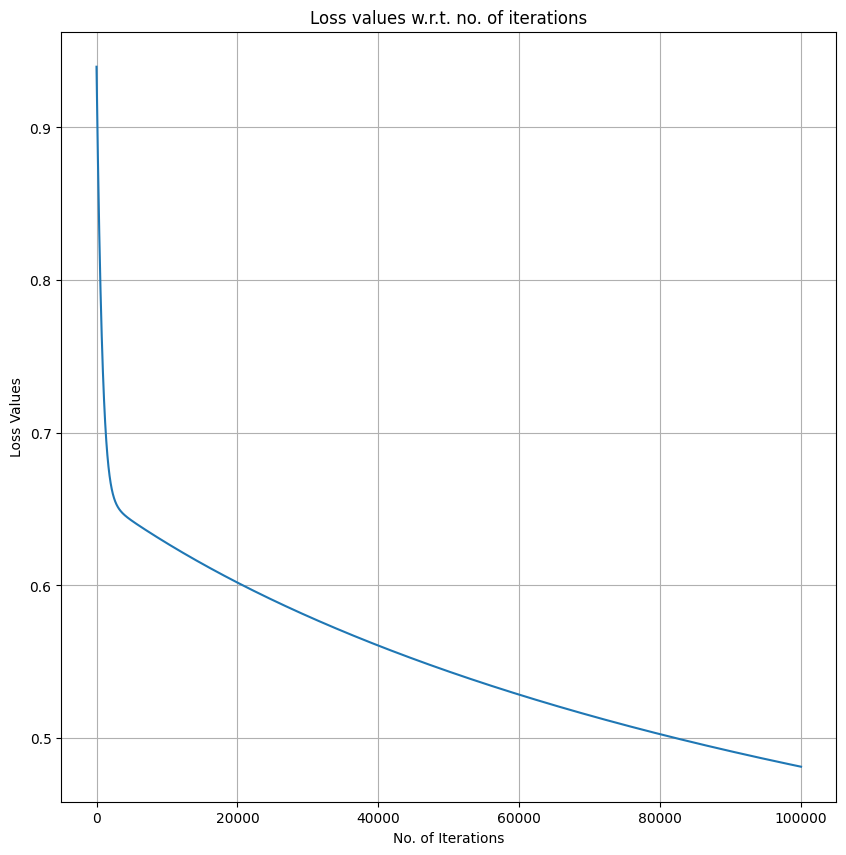

In [ ]:
# Lets plot the loss graph

# Declaring the size of the plot
plt.figure(figsize = (10,10))

# Creating the plot for loss function's values
plt.plot(np.arange(model.num_of_iter), model.model_loss)

# Putting labels
plt.xlabel("No. of Iterations")
plt.ylabel("Loss Values")

# Adding the title
plt.title("Loss values w.r.t. no. of iterations")
plt.grid(True)

# Showing the plot
plt.show()

In [ ]:
# ANALYSIS RESULTS :

'''
It can clearly be seen that the loss values kept on decreasing as the number of iterations
kept on increasing. This concludes that the the model is learning and getting inclined
toward a solution - highest accuracy and the best weights.

There is no evidence of overfitting since overfitting occurs when the loss
continues to drop on the training data but starts to increase on a validation
or test dataset.
'''

'\nIt can clearly be seen that the loss values kept on decreasing as the number of iterations\nkept on increasing. This concludes that the the model is learning and getting inclined\ntoward a solution - highest accuracy and the best weights.\n\nThere is no evidence of overfitting since overfitting occurs when the loss\ncontinues to drop on the training data but starts to increase on a validation\nor test dataset.\n'

In [ ]:
# Printing out the loss values for each iteration

for i,loss in enumerate(model.model_loss):
  print(f"Loss in iteration no. {i+1} ==> {loss}")

Streaming output truncated to the last 5000 lines.
Loss in iteration no. 61734 ==> 0.5259791649823449
Loss in iteration no. 61735 ==> 0.5259777572276674
Loss in iteration no. 61736 ==> 0.5259763494879511
Loss in iteration no. 61737 ==> 0.5259749417631966
Loss in iteration no. 61738 ==> 0.525973534053403
Loss in iteration no. 61739 ==> 0.5259721263585706
Loss in iteration no. 61740 ==> 0.5259707186786986
Loss in iteration no. 61741 ==> 0.5259693110137873
Loss in iteration no. 61742 ==> 0.525967903363836
Loss in iteration no. 61743 ==> 0.5259664957288448
Loss in iteration no. 61744 ==> 0.5259650881088134
Loss in iteration no. 61745 ==> 0.5259636805037413
Loss in iteration no. 61746 ==> 0.5259622729136286
Loss in iteration no. 61747 ==> 0.5259608653384747
Loss in iteration no. 61748 ==> 0.5259594577782798
Loss in iteration no. 61749 ==> 0.5259580502330432
Loss in iteration no. 61750 ==> 0.5259566427027651
Loss in iteration no. 61751 ==> 0.525955235187445
Loss in iteration no. 61752 ==> 0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Loss in iteration no. 91791 ==> 0.48950576046300603
Loss in iteration no. 91792 ==> 0.48950471527285294
Loss in iteration no. 91793 ==> 0.4895036700924154
Loss in iteration no. 91794 ==> 0.48950262492169333
Loss in iteration no. 91795 ==> 0.4895015797606864
Loss in iteration no. 91796 ==> 0.4895005346093945
Loss in iteration no. 91797 ==> 0.48949948946781774
Loss in iteration no. 91798 ==> 0.4894984443359559
Loss in iteration no. 91799 ==> 0.4894973992138086
Loss in iteration no. 91800 ==> 0.48949635410137593
Loss in iteration no. 91801 ==> 0.4894953089986578
Loss in iteration no. 91802 ==> 0.48949426390565404
Loss in iteration no. 91803 ==> 0.48949321882236446
Loss in iteration no. 91804 ==> 0.4894921737487889
Loss in iteration no. 91805 ==> 0.4894911286849275
Loss in iteration no. 91806 ==> 0.4894900836307797
Loss in iteration no. 91807 ==> 0.48948903858634585
Loss in iteration no. 91808 ==> 0.48948799355162537
Loss in iteration no. 91809 ==> 0.4894869485266185
Loss in iteration no.

In [ ]:
# Now that we have got all the required results, its time to try
# with different hyperparameters set (3 atleast)

# SET : 1

weights_latest = None
model = LogitRegression(learning_rate = 0.002, num_of_iter = 100100)

y_train = y_train.squeeze()
model.fit(X_train, y_train)

accuracy_vald = np.random.rand()

if accuracy_vald > accuracy:
  accuracy = accuracy_vald
  weights_latest = {
      "weights" : model.weights.tolist(),
      "bias" : model.bias
  }

predictions = model.predict(X_test)

y_test = y_test.squeeze()
prediction_truth_values = (predictions == y_test).astype(int)
accuracy = np.mean(prediction_truth_values) * 100

print(f"Accuracy of the Logistic Regression Model ==> {accuracy:.2f}%")
print(f"Number of Correct Predictions ==> {round((accuracy/100) * 69)}")
print(f"Number of Wrong Predictions ==> {round(69 - ((accuracy/100) * 69))}")

Accuracy of the Logistic Regression Model ==> 82.61%
Number of Correct Predictions ==> 57
Number of Wrong Predictions ==> 12


In [ ]:
print(model.weights.tolist())

[-3.5691291853744764, -1.403292941762292, -0.3294272472790273, 2.5972898536906484, 2.6568914064444216, 1.9369072141454389, 4.337076708283125]


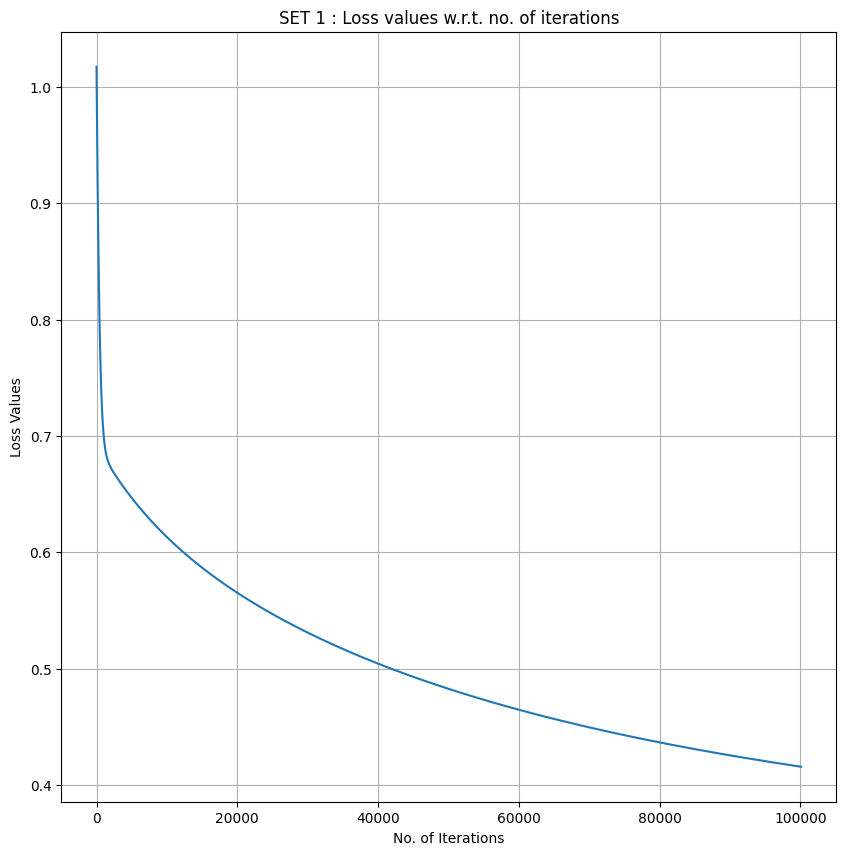

In [ ]:
plt.figure(figsize = (10,10))

plt.plot(np.arange(model.num_of_iter), model.model_loss)

plt.xlabel("No. of Iterations")
plt.ylabel("Loss Values")

plt.title("SET 1 : Loss values w.r.t. no. of iterations")
plt.grid(True)

plt.show()

In [ ]:
for i,loss in enumerate(model.model_loss):
  print(f"Loss in iteration no. {i+1} ==> {loss}")

Streaming output truncated to the last 5000 lines.
Loss in iteration no. 69806 ==> 0.4497615985495821
Loss in iteration no. 69807 ==> 0.44976019811762213
Loss in iteration no. 69808 ==> 0.44975879770791743
Loss in iteration no. 69809 ==> 0.4497573973204674
Loss in iteration no. 69810 ==> 0.4497559969552715
Loss in iteration no. 69811 ==> 0.4497545966123293
Loss in iteration no. 69812 ==> 0.44975319629164034
Loss in iteration no. 69813 ==> 0.4497517959932041
Loss in iteration no. 69814 ==> 0.44975039571702
Loss in iteration no. 69815 ==> 0.4497489954630875
Loss in iteration no. 69816 ==> 0.4497475952314063
Loss in iteration no. 69817 ==> 0.4497461950219757
Loss in iteration no. 69818 ==> 0.44974479483479535
Loss in iteration no. 69819 ==> 0.4497433946698646
Loss in iteration no. 69820 ==> 0.44974199452718305
Loss in iteration no. 69821 ==> 0.4497405944067501
Loss in iteration no. 69822 ==> 0.44973919430856546
Loss in iteration no. 69823 ==> 0.4497377942326284
Loss in iteration no. 69824

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Loss in iteration no. 96755 ==> 0.4187399333160055
Loss in iteration no. 96756 ==> 0.418738989324184
Loss in iteration no. 96757 ==> 0.41873804534511927
Loss in iteration no. 96758 ==> 0.41873710137881104
Loss in iteration no. 96759 ==> 0.4187361574252589
Loss in iteration no. 96760 ==> 0.41873521348446274
Loss in iteration no. 96761 ==> 0.4187342695564224
Loss in iteration no. 96762 ==> 0.4187333256411375
Loss in iteration no. 96763 ==> 0.4187323817386078
Loss in iteration no. 96764 ==> 0.41873143784883315
Loss in iteration no. 96765 ==> 0.4187304939718132
Loss in iteration no. 96766 ==> 0.4187295501075478
Loss in iteration no. 96767 ==> 0.41872860625603664
Loss in iteration no. 96768 ==> 0.4187276624172795
Loss in iteration no. 96769 ==> 0.4187267185912761
Loss in iteration no. 96770 ==> 0.41872577477802625
Loss in iteration no. 96771 ==> 0.41872483097752977
Loss in iteration no. 96772 ==> 0.41872388718978626
Loss in iteration no. 96773 ==> 0.41872294341479555
Loss in iteration no. 9

In [ ]:
# SET : 2

weights_latest = None
model = LogitRegression(learning_rate = 0.01, num_of_iter = 120000)

y_train = y_train.squeeze()
model.fit(X_train, y_train)

accuracy_vald = np.random.rand()

if accuracy_vald > accuracy:
  accuracy = accuracy_vald
  weights_latest = {
      "weights" : model.weights.tolist(),
      "bias" : model.bias
  }

predictions = model.predict(X_test)

y_test = y_test.squeeze()
prediction_truth_values = (predictions == y_test).astype(int)
accuracy = np.mean(prediction_truth_values) * 100

print(f"Accuracy of the Logistic Regression Model ==> {accuracy:.2f}%")
print(f"Number of Correct Predictions ==> {round((accuracy/100) * 69)}")
print(f"Number of Wrong Predictions ==> {round(69 - ((accuracy/100) * 69))}")

Accuracy of the Logistic Regression Model ==> 81.16%
Number of Correct Predictions ==> 56
Number of Wrong Predictions ==> 13


In [ ]:
print(model.weights.tolist())

[-8.463975884586507, -2.475206545636244, -0.12528160311836878, 4.853979943485019, 5.713296338673486, 3.481031856265465, 10.392594520052787]


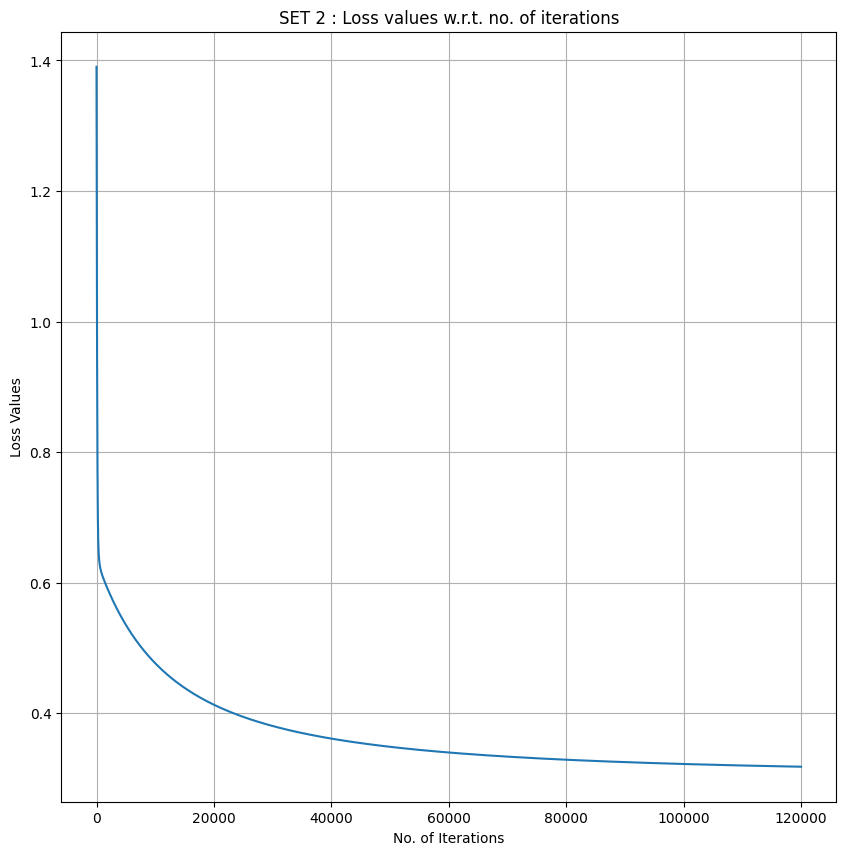

In [ ]:
plt.figure(figsize = (10,10))

plt.plot(np.arange(model.num_of_iter), model.model_loss)

plt.xlabel("No. of Iterations")
plt.ylabel("Loss Values")

plt.title("SET 2 : Loss values w.r.t. no. of iterations")
plt.grid(True)

plt.show()

In [ ]:
for i,loss in enumerate(model.model_loss):
  print(f"Loss in iteration no. {i+1} ==> {loss}")

Streaming output truncated to the last 5000 lines.
Loss in iteration no. 48297 ==> 0.35044555179099884
Loss in iteration no. 48298 ==> 0.3504444533984948
Loss in iteration no. 48299 ==> 0.35044335504689095
Loss in iteration no. 48300 ==> 0.35044225673618523
Loss in iteration no. 48301 ==> 0.35044115846637564
Loss in iteration no. 48302 ==> 0.3504400602374598
Loss in iteration no. 48303 ==> 0.3504389620494359
Loss in iteration no. 48304 ==> 0.3504378639023017
Loss in iteration no. 48305 ==> 0.350436765796055
Loss in iteration no. 48306 ==> 0.3504356677306937
Loss in iteration no. 48307 ==> 0.3504345697062157
Loss in iteration no. 48308 ==> 0.35043347172261907
Loss in iteration no. 48309 ==> 0.3504323737799014
Loss in iteration no. 48310 ==> 0.3504312758780607
Loss in iteration no. 48311 ==> 0.35043017801709486
Loss in iteration no. 48312 ==> 0.35042908019700175
Loss in iteration no. 48313 ==> 0.3504279824177793
Loss in iteration no. 48314 ==> 0.3504268846794253
Loss in iteration no. 483

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Loss in iteration no. 116281 ==> 0.31879780789824713
Loss in iteration no. 116282 ==> 0.3187976259045495
Loss in iteration no. 116283 ==> 0.31879744391448844
Loss in iteration no. 116284 ==> 0.3187972619280637
Loss in iteration no. 116285 ==> 0.31879707994527506
Loss in iteration no. 116286 ==> 0.31879689796612265
Loss in iteration no. 116287 ==> 0.31879671599060627
Loss in iteration no. 116288 ==> 0.31879653401872593
Loss in iteration no. 116289 ==> 0.31879635205048135
Loss in iteration no. 116290 ==> 0.3187961700858726
Loss in iteration no. 116291 ==> 0.31879598812489957
Loss in iteration no. 116292 ==> 0.31879580616756215
Loss in iteration no. 116293 ==> 0.3187956242138601
Loss in iteration no. 116294 ==> 0.3187954422637935
Loss in iteration no. 116295 ==> 0.3187952603173623
Loss in iteration no. 116296 ==> 0.3187950783745661
Loss in iteration no. 116297 ==> 0.3187948964354052
Loss in iteration no. 116298 ==> 0.31879471449987923
Loss in iteration no. 116299 ==> 0.31879453256798823


In [ ]:
# SET : 3

weights_latest = None
model = LogitRegression(learning_rate = 0.06, num_of_iter = 200000)

y_train = y_train.squeeze()
model.fit(X_train, y_train)

accuracy_vald = np.random.rand()

if accuracy_vald > accuracy:
  accuracy = accuracy_vald
  weights_latest = {
      "weights" : model.weights.tolist(),
      "bias" : model.bias
  }

predictions = model.predict(X_test)

y_test = y_test.squeeze()
prediction_truth_values = (predictions == y_test).astype(int)
accuracy = np.mean(prediction_truth_values) * 100

print(f"Accuracy of the Logistic Regression Model ==> {accuracy:.2f}%")
print(f"Number of Correct Predictions ==> {round((accuracy/100) * 69)}")
print(f"Number of Wrong Predictions ==> {round(69 - ((accuracy/100) * 69))}")

Accuracy of the Logistic Regression Model ==> 82.61%
Number of Correct Predictions ==> 57
Number of Wrong Predictions ==> 12


In [ ]:
print(model.weights.tolist())

[-11.123115440795031, -3.0307682591837106, 0.027828069248468246, 6.1099154025473075, 7.344389514658723, 2.888345818012927, 15.352090619246486]


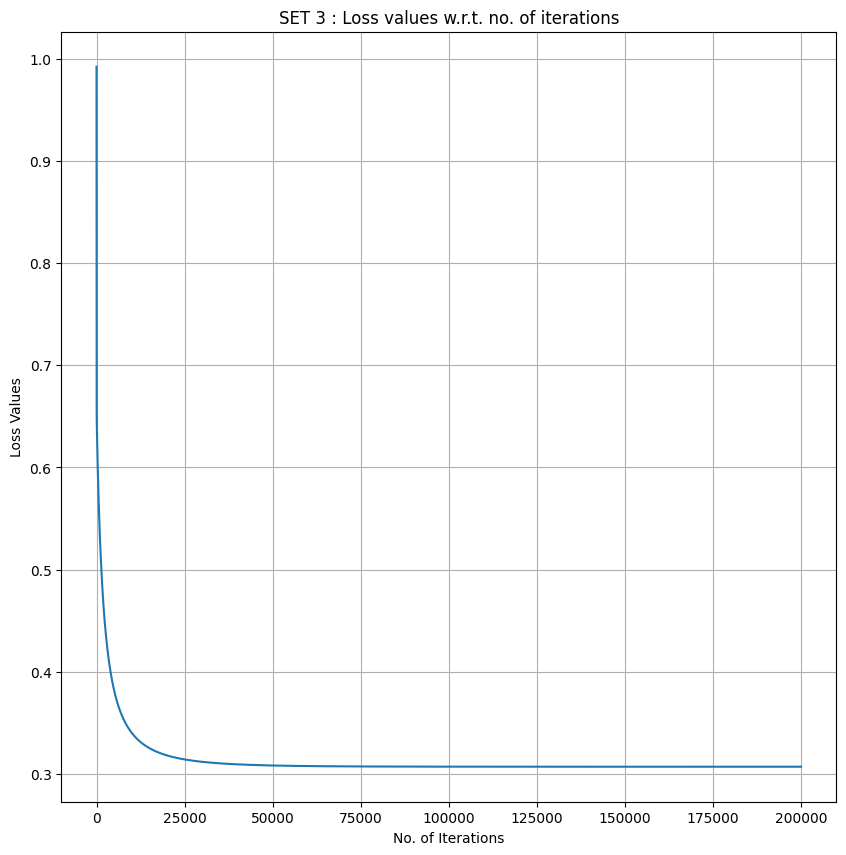

In [ ]:
plt.figure(figsize = (10,10))

plt.plot(np.arange(model.num_of_iter), model.model_loss)

plt.xlabel("No. of Iterations")
plt.ylabel("Loss Values")

plt.title("SET 3 : Loss values w.r.t. no. of iterations")
plt.grid(True)

plt.show()

In [ ]:
for i,loss in enumerate(model.model_loss):
  print(f"Loss in iteration no. {i+1} ==> {loss}")

Streaming output truncated to the last 5000 lines.
Loss in iteration no. 80991 ==> 0.3073522618101099
Loss in iteration no. 80992 ==> 0.30735225115239934
Loss in iteration no. 80993 ==> 0.3073522404953244
Loss in iteration no. 80994 ==> 0.307352229838885
Loss in iteration no. 80995 ==> 0.30735221918308187
Loss in iteration no. 80996 ==> 0.3073522085279152
Loss in iteration no. 80997 ==> 0.3073521978733839
Loss in iteration no. 80998 ==> 0.30735218721948854
Loss in iteration no. 80999 ==> 0.30735217656622865
Loss in iteration no. 81000 ==> 0.3073521659136051
Loss in iteration no. 81001 ==> 0.3073521552616167
Loss in iteration no. 81002 ==> 0.307352144610264
Loss in iteration no. 81003 ==> 0.30735213395954725
Loss in iteration no. 81004 ==> 0.3073521233094662
Loss in iteration no. 81005 ==> 0.30735211266002027
Loss in iteration no. 81006 ==> 0.3073521020112095
Loss in iteration no. 81007 ==> 0.3073520913630353
Loss in iteration no. 81008 ==> 0.3073520807154956
Loss in iteration no. 81009

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Loss in iteration no. 195001 ==> 0.30716838430114474
Loss in iteration no. 195002 ==> 0.30716838428314586
Loss in iteration no. 195003 ==> 0.3071683842651471
Loss in iteration no. 195004 ==> 0.3071683842471493
Loss in iteration no. 195005 ==> 0.30716838422915316
Loss in iteration no. 195006 ==> 0.30716838421115755
Loss in iteration no. 195007 ==> 0.3071683841931636
Loss in iteration no. 195008 ==> 0.3071683841751692
Loss in iteration no. 195009 ==> 0.30716838415717784
Loss in iteration no. 195010 ==> 0.3071683841391855
Loss in iteration no. 195011 ==> 0.3071683841211953
Loss in iteration no. 195012 ==> 0.30716838410320635
Loss in iteration no. 195013 ==> 0.3071683840852172
Loss in iteration no. 195014 ==> 0.3071683840672292
Loss in iteration no. 195015 ==> 0.30716838404924335
Loss in iteration no. 195016 ==> 0.30716838403125796
Loss in iteration no. 195017 ==> 0.30716838401327323
Loss in iteration no. 195018 ==> 0.30716838399528906
Los

In [ ]:
# Saving the values of the weights for the highest accuracy obtained

with open("soubhiks_imotapar_assignment1_part_2.pkl", "wb") as f:
  pickle.dump(model.weights.tolist(), f)
  !cp soubhiks_imotapar_assignment1_part_2.pkl "drive/My Drive/"

In [ ]:
# Checking whether the weights saved can be loaded and seen again

with open("soubhiks_imotapar_assignment1_part_2.pkl", "rb") as f:
  weights_loaded = pickle.load(f)

weights_loaded

[-11.123115440795031,
 -3.0307682591837106,
 0.027828069248468246,
 6.1099154025473075,
 7.344389514658723,
 2.888345818012927,
 15.352090619246486]